In [1169]:
import pickle
import glob
import os
import torch
import pickle as p
from tqdm import tqdm
from torch.nn.functional import normalize
import matplotlib.pyplot as plt
import numpy as np

In [1170]:
# trying to load the visualization
import pickle
import os

In [1222]:
# PATHS FOR UCF DATASET
# base_class_path = "/l/users/u21010225/no_finetuning_weights_CLIP_ZS_ucf101/"
# base_class_path = "/l/users/u21010225/full_clip_finetuned_weights_k400_ZS_ucf101/"
# base_class_path = "/l/users/u21010225/xclip_weights_k400_ZS_ucf101/"
# base_class_path = "/l/users/u21010225/text_clip_finetuned_weights_k400_ZS_ucf101/"
# base_class_path = "/l/users/u21010225/image_clip_finetuned_weights_k400_ZS_ucf101/"
# PATHS FOR UCF DENSE DATASET
# base_class_path = "/l/users/u21010225/full_clip_finetuned_weights_CLIP_ZS_ucf101_dense_samples/"
# base_class_path = "/l/users/u21010225/image_clip_finetuned_weights_ucf101_dense_samples/"
# base_class_path = "/l/users/u21010225/text_clip_finetuned_weights_ucf101_dense_samples/"
# base_class_path = "/l/users/u21010225/no_finetuning_weights_CLIP_ZS_ucf101_dense_samples/"
# base_class_path = "/l/users/u21010225/xclip_weights_k400_ZS_ucf101_dense_samples/"
# PATHS FOR HMDB DENSE DATASET
# base_class_path = "/l/users/u21010225/no_finetuning_weights_k400_ZS_hmdb51_dense_samples/"
# base_class_path = "/l/users/u21010225/text_clip_finetuned_weights_CLIP_ZS_hmdb51_dense_samples/"
# base_class_path = "/l/users/u21010225/image_clip_finetuned_weights_CLIP_ZS_hmdb51_dense_samples/"
# base_class_path = "/l/users/u21010225/full_clip_finetuned_weights_CLIP_ZS_hmdb51_dense_samples/"
# base_class_path = "/l/users/u21010225/xclip_weights_k400_ZS_hmdb51_dense_samples/"

# PATHS FOR HMDB DATASET
# base_class_path = "/l/users/u21010225/no_finetuning_weights_CLIP_ZS_hmdb51/"
# base_class_path = "/l/users/u21010225/complete_clip_finetuned_weights_k400_ZS_hmdb51/"
# base_class_path = "/l/users/u21010225/xclip_weights_k400_ZS_hmdb51/"
# base_class_path = "/l/users/u21010225/text_clip_finetuned_weights_k400_ZS_hmdb51/"
# base_class_path = "/l/users/u21010225/image_clip_finetuned_weights_k400_ZS_hmdb51/"


# PATHS FOR K600 ZS EVALUATION
# base_class_path = '/l/users/u21010225/K600_TSNE/inference_embeddings_ZS_only_kinetics400_seed1/'
# base_class_path = '/l/users/u21010225/K600_TSNE/inference_embeddings_image_only_kinetics400_seed1/'
# base_class_path = '/l/users/u21010225/K600_TSNE/inference_embeddings_text_only_kinetics400_seed1/'
# base_class_path = '/l/users/u21010225/K600_TSNE/inference_embeddings_vifi_clip_kinetics400_seed1/'
base_class_path = '/l/users/u21010225/K600_TSNE/inference_embeddings_XCLIP_kinetics400_seed1/'
all_list_base= os.listdir(base_class_path)

In [1223]:
all_base_classes = sorted(all_list_base)

In [1224]:
# print(len(all_base_classes))
print(len(all_base_classes))

7042


In [1225]:
# all_base_classes

In [1226]:
# # remove the last two for now
# all_base_classes = all_base_classes[:-2]
# all_new_classes = all_new_classes[:-2]

In [1227]:
len(all_base_classes)

7042

In [1228]:
# Testing only
p = open(base_class_path + all_base_classes[0], 'rb')
file = pickle.load(p)

In [1229]:
file.keys()

dict_keys(['video_embed', 'ids'])

In [1230]:
file['video_embed'], file['ids']

(tensor([[ 0.0407,  0.0060, -0.0070,  ...,  0.0533, -0.0033, -0.0022],
         [-0.0130, -0.0895, -0.0056,  ..., -0.0170, -0.0199, -0.0226]]),
 tensor([38, 58]))

In [1231]:
file['video_embed'].shape, file['ids'].shape, file['video_embed'].dtype

(torch.Size([2, 512]), torch.Size([2]), torch.float32)

In [1232]:
print(len(file['video_embed']))
print(len(file['ids']))

2
2


In [1233]:
# We need to iterate over all pickle files, and order the files based on 
# sorting list will have keys of each category,
# and each key will have indexes of its embeddings present in the embeddings list
sorting_dict_base = {}
# embedding list stores all embeddings, irrespective of categories
embeddings_list_base = []
for index, single in tqdm(enumerate(all_base_classes)):
    # print(main_path + base_class_path + single)
    file = open(base_class_path + single, 'rb')
    b = pickle.load(file)
    # print(b)
    # Parse through each category id
    for idx, single_id in enumerate(b['ids']):
        single_id = single_id.cpu().detach().item()
        # print(single_id)
        # break
        # check if entry already present in dict or not
        if single_id not in sorting_dict_base.keys():
            # Means make one
            sorting_dict_base[single_id] = []
        # Now populate its field
        temp = sorting_dict_base[single_id]
        temp.append(len(embeddings_list_base))
        # temp is index for the given embedding being added into the embedding list
        sorting_dict_base[single_id] = temp
        # single_embedding = (b['CLIP_embeddings'][idx].cpu().detach())
        single_embedding = (b['video_embed'][idx].cpu().detach().float())
        embeddings_list_base.append(single_embedding)

7042it [01:03, 111.67it/s]


In [1234]:
print(sorting_dict_base.keys())
print(len(sorting_dict_base.keys()))

dict_keys([38, 58, 93, 82, 149, 78, 150, 40, 65, 134, 106, 42, 114, 159, 6, 43, 113, 66, 135, 23, 157, 154, 32, 97, 2, 155, 74, 63, 41, 39, 109, 28, 88, 84, 126, 57, 27, 131, 124, 61, 5, 129, 87, 122, 1, 75, 59, 52, 80, 94, 115, 91, 79, 125, 12, 119, 10, 156, 16, 108, 89, 31, 138, 48, 4, 148, 68, 123, 153, 127, 22, 77, 35, 24, 102, 141, 152, 50, 76, 101, 0, 53, 145, 64, 49, 37, 20, 139, 11, 34, 105, 96, 128, 71, 118, 62, 30, 117, 158, 100, 99, 46, 70, 83, 140, 73, 67, 120, 72, 33, 130, 86, 13, 3, 14, 55, 112, 151, 51, 19, 60, 137, 116, 29, 69, 85, 56, 92, 44, 47, 90, 142, 107, 17, 81, 7, 146, 104, 18, 111, 26, 9, 8, 133, 103, 15, 144, 21, 121, 143, 110, 95, 147, 45, 36, 25, 98, 136, 132, 54])
160


In [1235]:

x = len(sorting_dict_base.keys())
x

160

In [1236]:
import random
sampling_categories = [index for index in range(x)]
# Later on, I can also sample the classes where our model is performing the best
# sampling_categories
# sampling_indices = [1, 3, 11, 12 ,18, 19, 23,28,30,32,33,36,37,38,39,40,41,42,43,44,45,49,16,20,46]
# sampling_categories = [list(sorting_dict_base.keys())[index] for index in sampling_indices]
# sampling_categories = random.sample(sampling_categories, 30)
# len(sampling_categories)
# # sampling_categories
# sampling_categories = [11,38,  5, 33, 23, 29, 43,22,26,9,35,1,15,0,41,31,30,36,18,25,10,40,39,27,28]

In [1237]:
# # use these for all other methods as well: [11,38,  5, 33, 23, 29, 43,22,26,9,35,1,15,0,41,31,30,36,18,25,10,40,39,27,28]
# sampling_indices = [1, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 23, 24, 25, 28, 29, 30, 33 , 35, 36, 38, 39, 41, 45, 46]
# sampling_categories = [list(sorting_dict_base.keys())[index] for index in sampling_indices]

In [1238]:
len(sampling_categories)
# sampling_categories = [43,  33,  30,  41,  25,  36,  27,  28,  5,  21,  38,  35,  15,  34,  22,  29,  9,  40,  31,  0,  1,  10,  26,  18,  23]

160

In [1239]:
# Now make a final list fully ordered
same_class_complete_list_base = []
same_class_embeddings = []
labels_for_each_embedding_base = []
for single_key in sorting_dict_base.keys():
    if True:  
        if single_key in sampling_categories:
            same_category_indexes = sorting_dict_base[single_key]
            # print(same_category_indexes)
            # Now sample the embeddings based on this list
            same_class_embeddings = [embeddings_list_base[i] for i in same_category_indexes]
            labels_for_each_embedding_base.append([single_key for i in range(len(same_class_embeddings))])
            # Here each list now represents the embeddings of the same class
            # and they are appended sequencially
            # so ordering is done
            same_class_complete_list_base.append(same_class_embeddings)

In [1240]:
# (labels_for_each_embedding_base)

In [1241]:
length = 0
for single in labels_for_each_embedding_base:
    length = length + len(single) 
length

14084

In [1242]:
length = 0
for single in labels_for_each_embedding_base:
    length = length + len(single) 
length

14084

In [1243]:
len(labels_for_each_embedding_base)

160

In [1244]:
# labels_for_each_embedding_base

In [1245]:
mapping_for_TSNE_plot_base = {}
for i,labels in enumerate(labels_for_each_embedding_base):
    mapping_for_TSNE_plot_base[i] = labels[0]
# mapping_for_TSNE_plot_base

In [1246]:
# mapping_for_TSNE_plot_novel = {}
# for i,labels in enumerate(labels_for_each_embedding_novel):
#     mapping_for_TSNE_plot_novel[i] = labels[0]
# mapping_for_TSNE_plot_novel

In [1247]:
print(len(labels_for_each_embedding_base))
len(same_class_complete_list_base) # total classes - base+novel

160


160

In [1248]:
# len(same_class_complete_list_novel) # total classes - base+novel

In [1249]:
len(same_class_complete_list_base)

160

In [1250]:
# Merge all lists
# take only k per class
k = 150
use_k = False
total_base = []
# total_spkd = []
total_class_base = []
# total_class_spkd = []
for i, labels in zip(same_class_complete_list_base,labels_for_each_embedding_base):
    if use_k:
        total_base += i[0:k]
        total_class_base += labels[0:k]
        print(len(i[0:k]))
    else:
        total_base += i
        total_class_base += labels

In [1251]:
A_base = torch.stack(total_base)

In [1252]:
print(A_base.shape)

torch.Size([14084, 512])


In [1253]:
# NOW LETS TRY THE TSNE PLOTS


#Import numpy
import numpy as np

#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE 
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb



In [1254]:
# So i need something similar
print(A_base.shape)

torch.Size([14084, 512])


In [1255]:
# Lets save the category ids in the same manner
print(len(total_class_base))

14084


In [1256]:
A_base = np.array(A_base)
labels_for_each_embedding_base = np.array(total_class_base)


In [1257]:
print((labels_for_each_embedding_base).shape)

(14084,)


In [1258]:
print(A_base.shape)

(14084, 512)


In [1259]:
TNSE_base = TSNE(perplexity=50).fit_transform(A_base) 

/home/uzair.khattak/.conda/envs/DETR/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/uzair.khattak/.conda/envs/DETR/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [1260]:
len(labels_for_each_embedding_base)

14084

In [1261]:
# Need to change the colors
color_list = []
clr_index = -1
same_cls = -1
for i in (labels_for_each_embedding_base):
    if i != same_cls:
        same_cls = i
        clr_index += 1
        color_list.append(clr_index)
    else:
        color_list.append(clr_index)
# color_list.append(color_list[-1])
color_list = np.array(color_list)

In [1262]:
print(len(color_list))
print(len(same_class_complete_list_base))

14084
160


In [1263]:
# from distinctipy import distinctipy
# # number of colours to generate
# N = 25

# # generate N visually distinct colours
# colors2 = distinctipy.get_colors(N, pastel_factor=0.2)


# # display the colours
# # distinctipy.color_swatch(colors)
# # np.array(colors).shape

In [1264]:
 np.array(sb.color_palette(n_colors=25)).shape

(25, 3)

In [1265]:
def plot(x, colors, name, title):
  
    # palette = np.array(sb.color_palette("bright"))  #Choosing color palette 
    # palette = np.array(sb.color_palette("hls", 20))
    # n_colors
    # palette = np.array(sb.color_palette(n_colors=24))
    palette = np.array(sb.color_palette(n_colors=len(x)))
    # palette = np.array(colors2)
    # palette =  np.array(sb.color_palette("husl", 30))
    # print(palette)
    # Create a scatter plot.
    f = plt.figure(figsize=(16, 16))
    # plt.axis('off')
    ax = plt.subplot()
    # plt.xticks(fontsize=15)
    # plt.yticks(fontsize=15)
    # ax.axes.get_xaxis().set_ticks([])
    # ax.axes.get_yaxis().set_ticks([])

    # plt.xticks(np.arange(np.min(x[0,:]), np.max(x[0,:]), 10), fontsize=15)
    # plt.yticks(np.arange(np.min(x[1,:]), np.max(x[1,:]), 10), fontsize=15)
    plt.axis('off')
    # plt.title(title, fontdict = {'fontsize' : 26}, y=-0.13)
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=20, c=palette[colors.astype(np.int)])
    # plt.rcParams["figure.figsize"] = [7.500 3.50]
    # plt.rcParams["figure.autolayout"] = True
    # plt.rcParams["axes.edgecolor"] = "gray"
    # plt.rcParams["axes.linewidth"] = 2.5
    # Add the labels for each digit.
    txts = []
    # for i in range(20):
    #     # Position of each label.
    #     xtext, ytext = np.median(x[colors == i, :], axis=0)
    #     txt = ax.text(xtext, ytext, str(i), fontsize=24)
    #     txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
    #     txts.append(txt)
    plt.savefig(name, bbox_inches='tight', pad_inches=0, transparent=False, dpi=500)
    return f, ax, txts


In [1266]:
# def plot(x, colors, name, title):
  
#     # palette = np.array(sb.color_palette("bright"))  #Choosing color palette 
#     # palette = np.array(sb.color_palette("hls", 20))
#     # n_colors
#     # palette = np.array(sb.color_palette(n_colors=24))
#     # palette = np.array(sb.color_palette(n_colors=len(x)))
#     palette = np.array(colors2)
#     # palette =  np.array(sb.color_palette("husl", 30))
#     # print(palette)
#     # Create a scatter plot.
#     f = plt.figure(figsize=(10, 10))
#     # plt.axis('off')
#     ax = plt.subplot()
#     # plt.xticks(fontsize=15)
#     # plt.yticks(fontsize=15)
#     # ax.axes.get_xaxis().set_ticks([])
#     # ax.axes.get_yaxis().set_ticks([])

#     # plt.xticks(np.arange(np.min(x[0,:]), np.max(x[0,:]), 10), fontsize=15)
#     # plt.yticks(np.arange(np.min(x[1,:]), np.max(x[1,:]), 10), fontsize=15)
#     plt.axis('off')
#     # plt.title(title, fontdict = {'fontsize' : 26}, y=-0.13)
#     sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
#     # plt.rcParams["figure.figsize"] = [7.500 3.50]
#     # plt.rcParams["figure.autolayout"] = True
#     # plt.rcParams["axes.edgecolor"] = "gray"
#     # plt.rcParams["axes.linewidth"] = 2.5
#     # Add the labels for each digit.
#     txts = []
#     # for i in range(20):
#     #     # Position of each label.
#     #     xtext, ytext = np.median(x[colors == i, :], axis=0)
#     #     txt = ax.text(xtext, ytext, str(i), fontsize=24)
#     #     txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
#     #     txts.append(txt)
#     plt.savefig(name, bbox_inches='tight', pad_inches=0, transparent=False, dpi=500)
#     return f, ax, txts


In [1267]:
len(color_list)

14084

/home/uzair.khattak/.conda/envs/DETR/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(<Figure size 936x936 with 1 Axes>, <AxesSubplot:>, [])

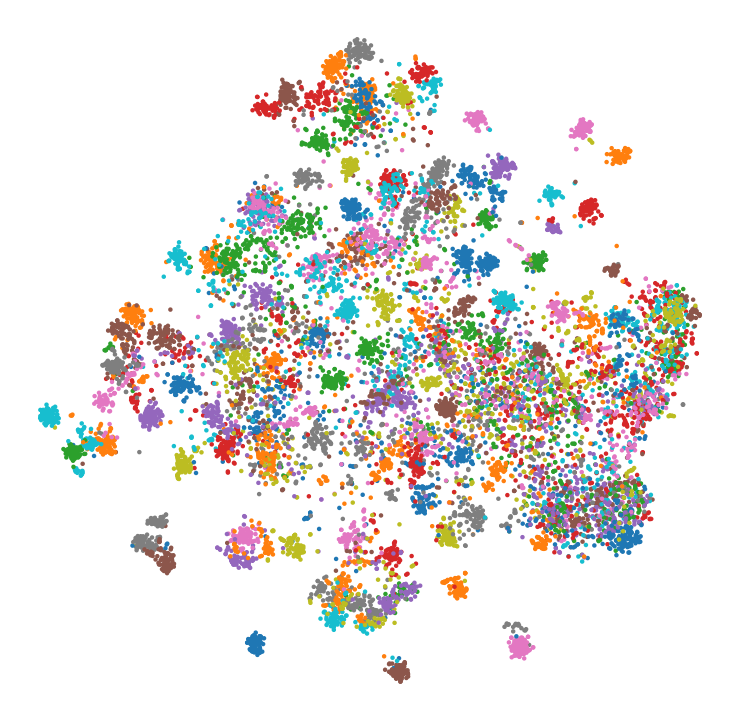

In [1066]:
plot(TNSE_base,color_list,'./vanilla_clip_K600_selected_classes_dense_new_color', 'a) CLIP')

/home/uzair.khattak/.conda/envs/DETR/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(<Figure size 936x936 with 1 Axes>, <AxesSubplot:>, [])

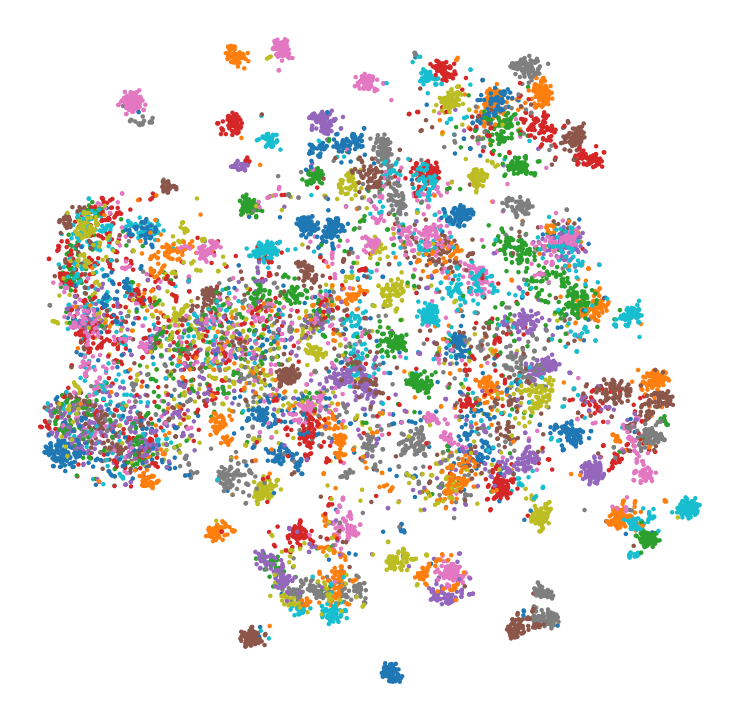

In [1168]:
plot(TNSE_base,color_list,'./clip_text_finetuned_k600_selected_classes_dense_new_colors', 'a) CLIP')

/home/uzair.khattak/.conda/envs/DETR/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(<Figure size 936x936 with 1 Axes>, <AxesSubplot:>, [])

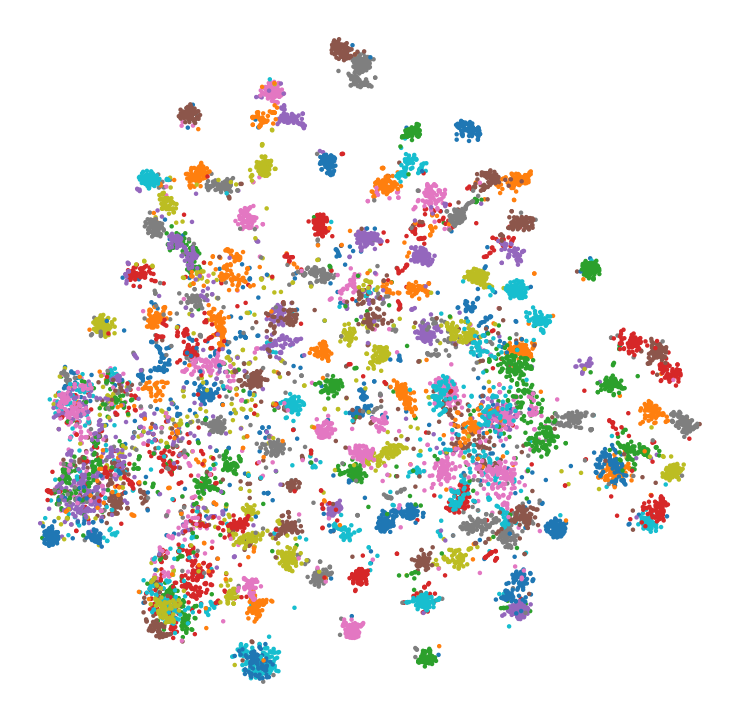

In [1121]:
plot(TNSE_base,color_list,'./clip_image_finetuned_k600_selected_classes_dense_new_colors', 'a) CLIP')

/home/uzair.khattak/.conda/envs/DETR/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:>, [])

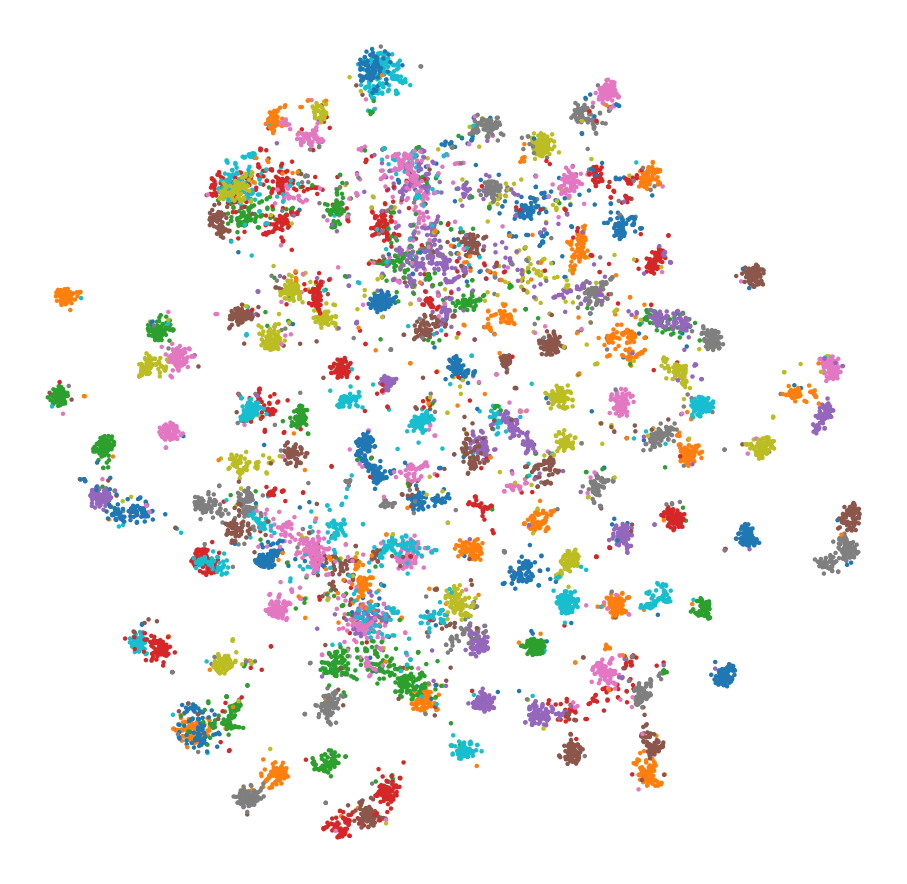

In [1221]:
plot(TNSE_base,color_list,'./clip_both_fintuned_k600_selected_classes_dense_new_color', 'a) CLIP')

/home/uzair.khattak/.conda/envs/DETR/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:>, [])

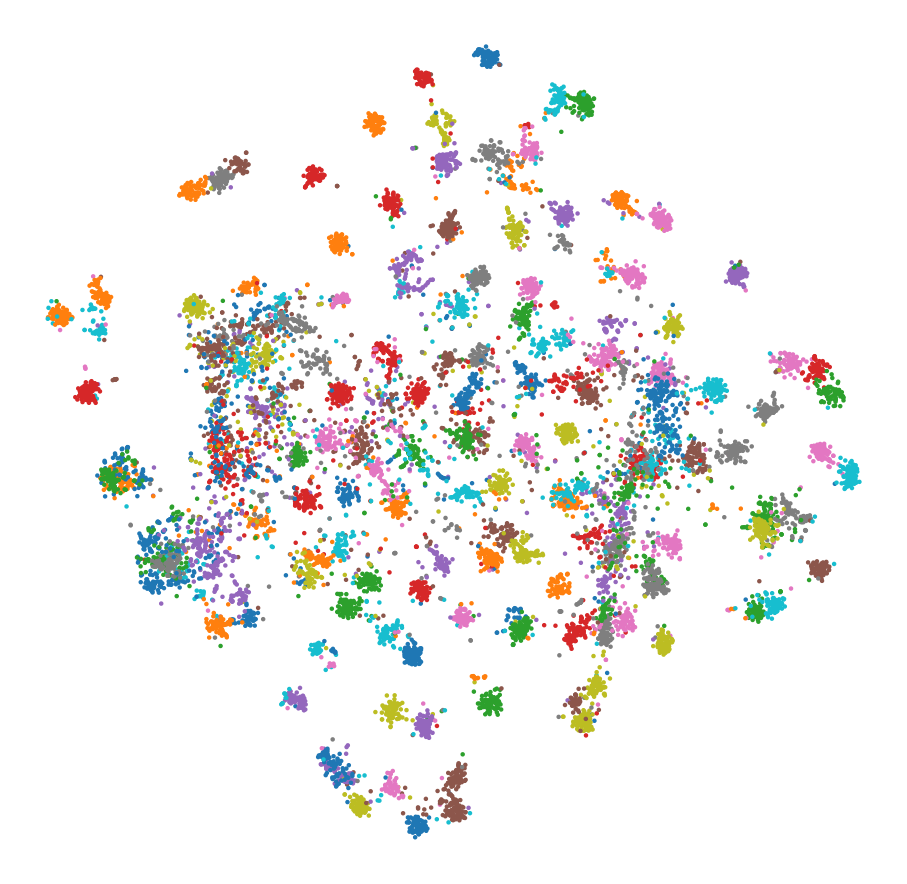

In [1268]:
plot(TNSE_base,color_list,'./XCLIP_hmdb_all_classes_dense_new_colors', 'a) CLIP')

In [1067]:
# # Need to change the colors
# color_list = []
# clr_index = -1
# same_cls = -1
# for i in (labels_for_each_embedding_novel):
#     if i != same_cls:
#         same_cls = i
#         clr_index += 1
#         color_list.append(clr_index)
#     else:
#         color_list.append(clr_index)
# # color_list.append(color_list[-1])
# color_list = np.array(color_list)

In [1068]:
# len(color_list)
# print(len(same_class_complete_list_novel))

In [1069]:
# def plot(x, colors, name, title):
  
#     palette = np.array(sb.color_palette("bright"))  #Choosing color palette 
#     palette = np.array(sb.color_palette(n_colors=len(x)))
#     # print(palette)
#     # Create a scatter plot.
#     f = plt.figure(figsize=(4, 4))
#     # plt.axis('off')
#     ax = plt.subplot()
#     # plt.xticks(fontsize=15)
#     # plt.yticks(fontsize=15)
#     # ax.axes.get_xaxis().set_ticks([])
#     # ax.axes.get_yaxis().set_ticks([])

#     # plt.xticks(np.arange(np.min(x[0,:]), np.max(x[0,:]), 10), fontsize=15)
#     # plt.yticks(np.arange(np.min(x[1,:]), np.max(x[1,:]), 10), fontsize=15)
#     plt.axis('off')
#     # plt.title(title, fontdict = {'fontsize' : 26}, y=-0.13)
#     sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
#     # plt.rcParams["figure.figsize"] = [7.50, 3.50]
#     # plt.rcParams["figure.autolayout"] = True
#     # plt.rcParams["axes.edgecolor"] = "gray"
#     # plt.rcParams["axes.linewidth"] = 2.5
#     # Add the labels for each digit.
#     txts = []
#     # for i in range(20):
#     #     # Position of each label.
#     #     xtext, ytext = np.median(x[colors == i, :], axis=0)
#     #     txt = ax.text(xtext, ytext, str(i), fontsize=24)
#     #     txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
#     #     txts.append(txt)
#     plt.savefig(name, bbox_inches='tight', pad_inches=0, transparent=False, dpi=500)
#     return f, ax, txts


In [1070]:
# TNSE_novel.shape

In [1071]:
# plot(TNSE_novel,color_list,'ICLR_cocoop/' + dataset_name + '_novel_class_compound', 'a) CLIP')

In [1072]:
# len(TNSE_novel)

In [1073]:
# Also perform per class classification
# To verify if everything is working completely fine or not
labels_for_each_embedding_base

array([ 78,  78,  78, ..., 117, 117, 117])

In [1074]:
labels_for_each_embedding_base

array([ 78,  78,  78, ..., 117, 117, 117])

In [806]:
base_class_path

'/l/users/u21010225/text_clip_finetuned_weights_CLIP_ZS_hmdb51_dense_samples/'

In [807]:
# Testing only
p = open(base_class_path + all_base_classes[0], 'rb')
file = pickle.load(p)
base_class_text_embeddings = file['text_embed']
base_class_text_embeddings.shape

torch.Size([51, 512])

In [808]:
# # Get the text features from the disk
# p = open(main_path + new_class_path + all_new_classes[-1], 'rb')
# file = pickle.load(p)

In [809]:
# novel_class_text_embeddings = file['text_embeddings']
# novel_class_text_embeddings.shape

In [810]:
# Need to rearrange the classifier embeddings order
base_class_text_embeddings.shape

torch.Size([51, 512])

In [811]:
# base_class_text_embeddings = base_class_text_embeddings[0]

In [812]:
temp = torch.zeros(base_class_text_embeddings.shape)
# Now fill the temp based on the index
idx = 0
for key in mapping_for_TSNE_plot_base.keys():
    index = mapping_for_TSNE_plot_base[key]
    # Pick this index embeddings and plug in the empty array
    temp[idx,:] = base_class_text_embeddings[index]
    idx = idx + 1
base_class_text_embeddings = temp.to('cuda').half()
print(base_class_text_embeddings.shape)

torch.Size([51, 512])


In [813]:
# temp = torch.zeros(novel_class_text_embeddings.shape)
# # Now fill the temp based on the index
# idx = 0
# for key in mapping_for_TSNE_plot_novel.keys():
#     index = mapping_for_TSNE_plot_novel[key]
#     # Pick this index embeddings and plug in the empty array
#     temp[idx,:] = novel_class_text_embeddings[index]
#     idx = idx + 1
# novel_class_text_embeddings = temp.to('cuda').half()
# print(novel_class_text_embeddings.shape)

In [814]:
# novel_class_text_embeddings.device

In [815]:
# Similarly we have the corresponding image region embeddings as well
# Now lets generate the logits:
correct_per_category_base = {}
# correct_per_category_spkd = {}
idx = 0
for category_embeddings_base in same_class_complete_list_base:
    # Now simply 
    # shape of both lists are
    # n x 512 (n is number of instances present in that category)
    # print(category_embeddings_clip[0])
    # break
    # print(len(category_embeddings_clip))
    category_embeddings_base = torch.stack(category_embeddings_base, 0)
    # print((category_embeddings_clip.shape))
    # break
    base_predictions = (100 * category_embeddings_base.cuda() @ base_class_text_embeddings.float().T).softmax(dim=-1).argmax(-1)

    # Resultant shapes n x 1, now need to make them nx1 so that we can directly compare
    # print(clip_predictions.shape)
    # Now count how many times the prediction was correct
    GT_base = idx * torch.ones(len(base_predictions)).cuda()


    # Now compare the prediction
    total_correct_base = torch.sum(GT_base==base_predictions)
    # print(total_correct_clip)
    # print(total_correct_rpn)
    # break
    correct_per_category_base[mapping_for_TSNE_plot_base[idx]] = total_correct_base
    idx = idx +1

In [816]:
# Now finally calculating accuracy
base_accuracy = sum([correct_per_category_base[x].item() for x in correct_per_category_base.keys()])
print('BaseClass accuracy: ', (base_accuracy / A_base.shape[0]) * 100)

BaseClass accuracy:  81.77777777777779


In [785]:

for index, i in enumerate(correct_per_category_base):
    print(index, "  ", correct_per_category_base[i])
# A_base.shape[0]
correct_per_category_base.keys()

0    tensor(14, device='cuda:0')
1    tensor(84, device='cuda:0')
2    tensor(11, device='cuda:0')
3    tensor(1, device='cuda:0')
4    tensor(2, device='cuda:0')
5    tensor(19, device='cuda:0')
6    tensor(78, device='cuda:0')
7    tensor(89, device='cuda:0')
8    tensor(76, device='cuda:0')
9    tensor(67, device='cuda:0')
10    tensor(3, device='cuda:0')
11    tensor(76, device='cuda:0')
12    tensor(55, device='cuda:0')
13    tensor(66, device='cuda:0')
14    tensor(83, device='cuda:0')
15    tensor(58, device='cuda:0')
16    tensor(89, device='cuda:0')
17    tensor(0, device='cuda:0')
18    tensor(5, device='cuda:0')
19    tensor(17, device='cuda:0')
20    tensor(11, device='cuda:0')
21    tensor(0, device='cuda:0')
22    tensor(0, device='cuda:0')
23    tensor(86, device='cuda:0')
24    tensor(89, device='cuda:0')
25    tensor(42, device='cuda:0')
26    tensor(0, device='cuda:0')
27    tensor(1, device='cuda:0')
28    tensor(88, device='cuda:0')
29    tensor(80, device='cuda:0')

dict_keys([17, 43, 32, 12, 3, 46, 33, 30, 41, 25, 2, 36, 27, 28, 5, 21, 38, 42, 37, 49, 19, 8, 48, 35, 15, 34, 20, 47, 22, 29, 9, 16, 24, 40, 50, 31, 0, 45, 1, 10, 39, 26, 13, 11, 7, 18, 23, 14, 6, 4, 44])

In [474]:
A_base.shape[0]

4590

{0: tensor(26, device='cuda:0'),
 1: tensor(33, device='cuda:0'),
 2: tensor(38, device='cuda:0'),
 26: tensor(43, device='cuda:0'),
 27: tensor(23, device='cuda:0'),
 28: tensor(29, device='cuda:0'),
 29: tensor(33, device='cuda:0'),
 30: tensor(6, device='cuda:0'),
 31: tensor(30, device='cuda:0'),
 32: tensor(25, device='cuda:0'),
 33: tensor(41, device='cuda:0'),
 34: tensor(0, device='cuda:0'),
 35: tensor(34, device='cuda:0'),
 36: tensor(33, device='cuda:0'),
 37: tensor(2, device='cuda:0'),
 38: tensor(39, device='cuda:0'),
 39: tensor(26, device='cuda:0'),
 40: tensor(35, device='cuda:0'),
 41: tensor(29, device='cuda:0'),
 42: tensor(28, device='cuda:0'),
 43: tensor(43, device='cuda:0'),
 44: tensor(22, device='cuda:0'),
 45: tensor(30, device='cuda:0'),
 46: tensor(34, device='cuda:0'),
 47: tensor(31, device='cuda:0'),
 48: tensor(42, device='cuda:0'),
 49: tensor(21, device='cuda:0'),
 3: tensor(30, device='cuda:0'),
 4: tensor(5, device='cuda:0'),
 5: tensor(30, device='

dict_keys([0, 1, 2, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

{0: tensor(26, device='cuda:0'),
 1: tensor(33, device='cuda:0'),
 2: tensor(38, device='cuda:0'),
 26: tensor(43, device='cuda:0'),
 27: tensor(23, device='cuda:0'),
 28: tensor(29, device='cuda:0'),
 29: tensor(33, device='cuda:0'),
 30: tensor(6, device='cuda:0'),
 31: tensor(30, device='cuda:0'),
 32: tensor(25, device='cuda:0'),
 33: tensor(41, device='cuda:0'),
 34: tensor(0, device='cuda:0'),
 35: tensor(34, device='cuda:0'),
 36: tensor(33, device='cuda:0'),
 37: tensor(2, device='cuda:0'),
 38: tensor(39, device='cuda:0'),
 39: tensor(26, device='cuda:0'),
 40: tensor(35, device='cuda:0'),
 41: tensor(29, device='cuda:0'),
 42: tensor(28, device='cuda:0'),
 43: tensor(43, device='cuda:0'),
 44: tensor(22, device='cuda:0'),
 45: tensor(30, device='cuda:0'),
 46: tensor(34, device='cuda:0'),
 47: tensor(31, device='cuda:0'),
 48: tensor(42, device='cuda:0'),
 49: tensor(21, device='cuda:0'),
 3: tensor(30, device='cuda:0'),
 4: tensor(5, device='cuda:0'),
 5: tensor(30, device='